## Python Basic

In [2]:
a = 3
b = 2
a + b

5

## Linear Regression

In [5]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/holintech/master/data/salary.csv', index_col = 0)

In [7]:
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


In [12]:
from matplotlib import pyplot as plt
X = df[['year']]
Y = df['salary'].values

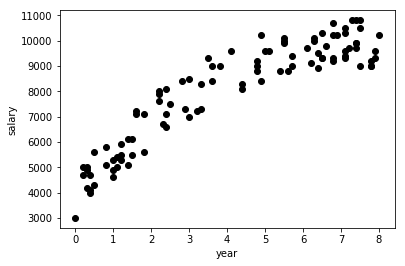

In [15]:
plt.scatter(X, Y,  color='black')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()


In [16]:
from sklearn.linear_model import LinearRegression
?LinearRegression

In [17]:
regr = LinearRegression()

In [18]:
regr.fit(X,Y)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
import numpy as np
regr.predict(np.array([[0],[2],[4]]))

array([5049.00989981, 6474.1981721 , 7899.3864444 ])

In [22]:
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)


Coefficients: [712.59413615]
Intercept: 5049.009899813836


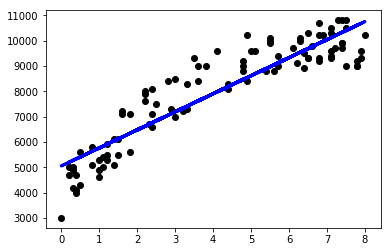

In [23]:
plt.scatter(X, Y,  color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.show()

## Polynomial Regression

In [31]:
weight  = 70
# array list
weights = [60,70,80, '90公斤']

import numpy as np
# array
np.array([60,70,80])
weights = np.array([60,70,80, '90公斤'])
weights

array(['60', '70', '80', '90公斤'], dtype='<U21')

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LinearRegression

poly_reg = PolynomialFeatures(degree=2)
X_       = poly_reg.fit_transform(X)


In [33]:
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
X2 = X.sort_values(['year'])
X2_ = poly_reg.fit_transform(X2)

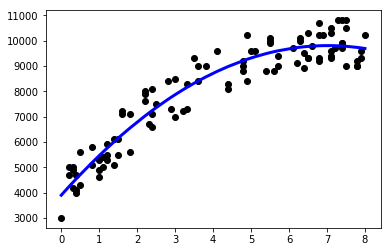

In [36]:
plt.scatter(X, Y,  color='black')
plt.plot(X2, regr.predict(X2_), linewidth = 3, color="blue")
plt.show()

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LinearRegression

poly_reg = PolynomialFeatures(degree=3)
X_       = poly_reg.fit_transform(X)


In [38]:
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
X3 = X.sort_values(['year'])
X3_ = poly_reg.fit_transform(X3)

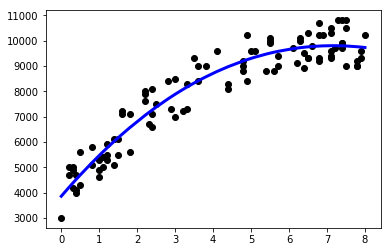

In [40]:
plt.scatter(X, Y,  color='black')
plt.plot(X3, regr.predict(X3_), linewidth = 3, color="blue")
plt.show()

## Pandas 參考書籍
- https://www.books.com.tw/products/0010800271

## 多元迴歸模型

In [41]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/holintech/master/data/house-prices.csv')

In [43]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [45]:
df['Brick'].unique()

array(['No', 'Yes'], dtype=object)

In [46]:
df['Neighborhood'].unique()

array(['East', 'North', 'West'], dtype=object)

In [51]:
import pandas
#pandas.get_dummies(df['Brick'])
#pandas.get_dummies(df['Neighborhood'])
house = pandas.concat([df, pandas.get_dummies(df['Brick']),pandas.get_dummies(df['Neighborhood'])], axis = 1)

In [53]:
del house['No']
del house['Brick']
del house['West']
del house['Neighborhood']
del house['Home']
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,East,North
0,114300,1790,2,2,2,0,1,0
1,114200,2030,4,2,3,0,1,0
2,114800,1740,3,2,1,0,1,0
3,94700,1980,3,2,3,0,1,0
4,119800,2130,3,3,3,0,1,0


In [54]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
X = house[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East','North']]
Y = house['Price'].values


In [56]:
regr.fit(X,Y)
#regr.predict(X)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 評估迴歸模型

In [57]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sat, 22 Dec 2018   Prob (F-statistic):           8.25e-50
Time:                        12:19:30   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.284e+04   1.02e+04      2.231      0.0

In [65]:
predictcols = X.columns.values

In [69]:
dic = {'a': 3, 'b': 10, 'c':5, 'd':7 }
from collections import Counter
c = Counter(dic)
c.most_common()

[('b', 10), ('d', 7), ('c', 5), ('a', 3)]

In [70]:
a = [3,5,7,8]
a[::-1]

[8, 7, 5, 3]

In [98]:
import itertools
AICs = {}
for k in range(1, len(predictcols) +1):
    for variables in itertools.combinations(predictcols, k):
        predictors  = X[list(variables)]
        predictors2 = sm.add_constant(predictors)
        est = sm.OLS(Y, predictors2)
        res = est.fit()
        AICs[variables] = res.aic

from collections import Counter
c = Counter(AICs)
c.most_common()[::-1][0:10]


[(('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'),
  2729.318981401249),
 (('SqFt', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'), 2734.639925628371),
 (('SqFt', 'Bedrooms', 'Offers', 'Yes', 'East', 'North'), 2741.3156609981506),
 (('SqFt', 'Offers', 'Yes', 'East', 'North'), 2748.8490492259953),
 (('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East'),
  2766.624649944451),
 (('SqFt', 'Bathrooms', 'Yes', 'East', 'North'), 2776.9030655919946),
 (('SqFt', 'Bedrooms', 'Bathrooms', 'Yes', 'East', 'North'),
  2777.849673430561),
 (('SqFt', 'Bedrooms', 'Offers', 'Yes', 'East'), 2779.7703894909137),
 (('SqFt', 'Bedrooms', 'Yes', 'East', 'North'), 2783.144374438954),
 (('SqFt', 'Yes', 'East', 'North'), 2783.192203175976)]

## RFE
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

## RFECV
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [81]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
 

names = predictcols
lr = LinearRegression()
rfe = RFE(lr, 3, step=1)
rfe.fit(X,Y)
 
sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))

[(1, 'East'),
 (1, 'North'),
 (1, 'Yes'),
 (2, 'Bathrooms'),
 (3, 'Bedrooms'),
 (4, 'Offers'),
 (5, 'SqFt')]

In [82]:
predictcols

array(['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'],
      dtype=object)

In [83]:
rfe.ranking_

array([5, 3, 2, 4, 1, 1, 1])

In [87]:
rom sklearn.feature_selection import RFECV

selector = RFECV(lr, step=1, cv=5)
selector = selector.fit(X, Y)
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1])

## 過度適配案例

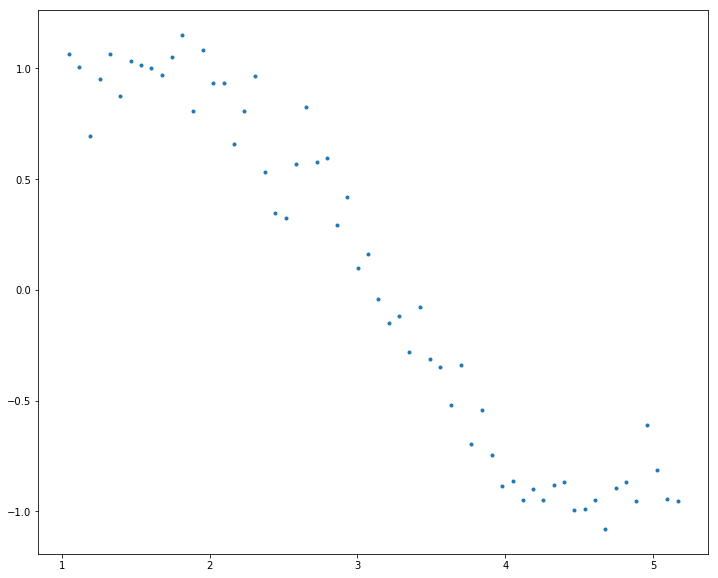

In [88]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [89]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,1.065763,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,1.006086,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,0.695374,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.949799,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.063496,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


In [90]:
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

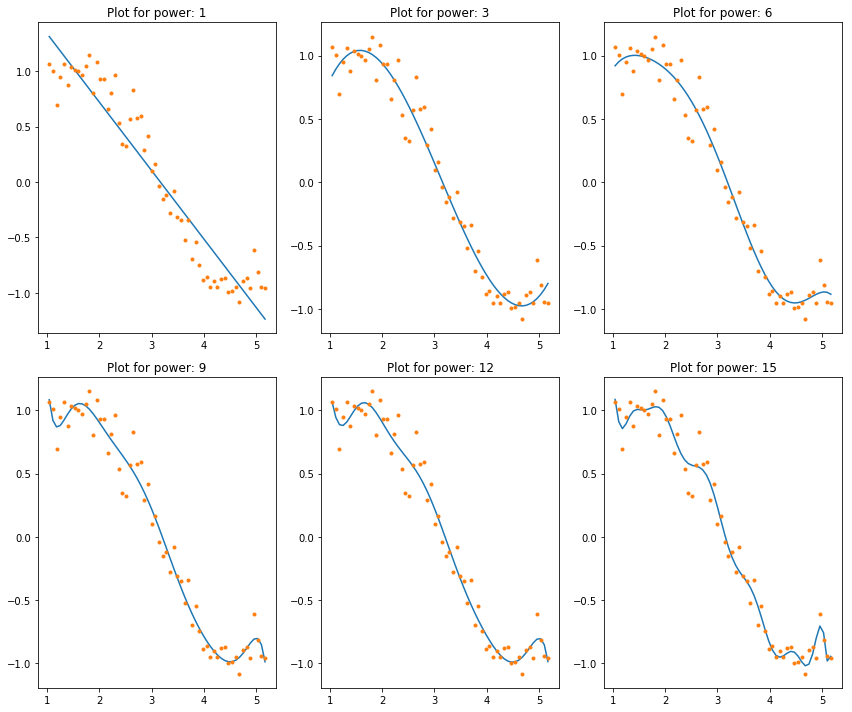

In [91]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [92]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.227356e-17
  overwrite_a=True).T


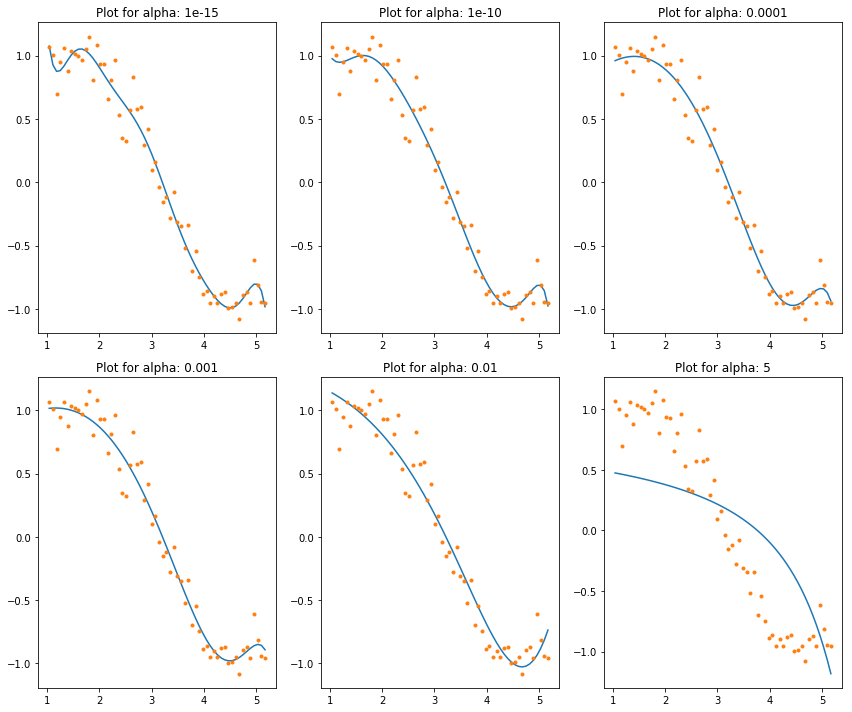

In [93]:
import pandas as pd
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [94]:
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.873128,94.546,-299.399,380.513,-238.697,68.95,-1.35583,-3.85305,0.412743,0.164046,-0.0218754,-0.00621097,0.000771378,0.000253482,-5.86398e-05,3.93574e-06,-6.10787e-08
alpha_1e-10,0.922601,11.1701,-28.9629,31.0694,-15.2353,2.89182,0.169364,-0.091002,-0.0108382,0.00198378,0.00063697,2.40848e-05,-2.00113e-05,-4.2037e-06,2.19353e-07,2.2729e-07,-2.33741e-08
alpha_1e-08,0.949292,1.33999,-1.53065,1.74946,-0.680458,0.038843,0.0158179,0.00015918,-0.00035954,-5.37182e-05,-2.91013e-07,1.08091e-06,1.89389e-07,1.96191e-08,3.92864e-09,8.19001e-10,-4.62722e-10
alpha_0.0001,0.962018,0.56132,0.546549,-0.128142,-0.025713,-0.00282024,-0.000110299,4.0575e-05,1.52075e-05,3.65239e-06,7.36585e-07,1.30351e-07,1.9445e-08,1.93533e-09,-1.30259e-10,-1.54943e-10,-6.17707e-11
alpha_0.001,1.00178,0.817638,0.305147,-0.0866873,-0.0204755,-0.00283643,-0.000219199,1.81203e-05,1.2399e-05,3.42971e-06,7.28224e-07,1.29346e-07,1.86865e-08,1.70622e-09,-1.5108e-10,-1.40448e-10,-5.16034e-11
alpha_0.01,1.43579,1.29889,-0.0883959,-0.0515001,-0.010099,-0.00141244,-0.000131521,7.23082e-07,4.13617e-06,1.30478e-06,2.96417e-07,5.6157e-08,8.97185e-09,1.09406e-09,4.29249e-11,-3.14226e-11,-1.48705e-11
alpha_1,5.64874,0.968886,-0.139008,-0.019268,-0.00300434,-0.000465519,-6.97006e-05,-9.90064e-06,-1.29236e-06,-1.42846e-07,-9.33025e-09,1.30688e-09,7.8035e-10,2.40231e-10,6.15627e-11,1.44581e-11,3.22713e-12
alpha_5,13.8383,0.54826,-0.0588687,-0.00852167,-0.00141945,-0.000241004,-4.08318e-05,-6.87431e-06,-1.14898e-06,-1.90534e-07,-3.13146e-08,-5.09188e-09,-8.16953e-10,-1.28804e-10,-1.98296e-11,-2.95006e-12,-4.16233e-13
alpha_10,18.0248,0.400342,-0.0372364,-0.00552679,-0.000949634,-0.000167292,-2.95811e-05,-5.23032e-06,-9.24527e-07,-1.63445e-07,-2.89111e-08,-5.11838e-09,-9.07113e-10,-1.60954e-10,-2.85942e-11,-5.08624e-12,-9.05846e-13
alpha_20,22.7205,0.276703,-0.0224693,-0.00340492,-0.000599344,-0.000108458,-1.9744e-05,-3.60077e-06,-6.57576e-07,-1.2028e-07,-2.20428e-08,-4.04814e-09,-7.45085e-10,-1.37447e-10,-2.54123e-11,-4.70877e-12,-8.7438e-13


In [95]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


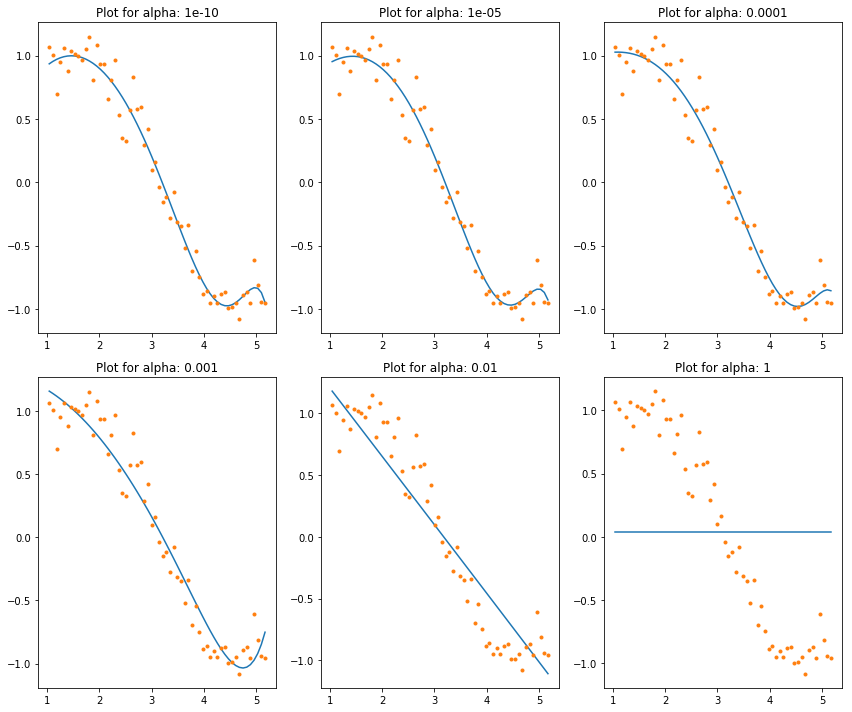

In [96]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [97]:
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.956715,0.222238,1.06464,-0.369048,0.000885176,0.00163313,-0.000118539,-6.43874e-05,-6.27554e-06,1.44874e-06,7.82079e-07,2.0758e-07,3.98135e-08,5.35996e-09,1.81973e-10,-1.9545e-10,-9.23654e-11
alpha_1e-10,0.956715,0.222239,1.06463,-0.369044,0.000884005,0.00163297,-0.000118453,-6.43884e-05,-6.27604e-06,1.44856e-06,7.82087e-07,2.07577e-07,3.98123e-08,5.35972e-09,1.82126e-10,-1.95439e-10,-9.23689e-11
alpha_1e-08,0.956708,0.222374,1.06416,-0.368607,0.000768994,0.00161624,-0.000109896,-6.44771e-05,-6.32441e-06,1.43063e-06,7.83012e-07,2.07335e-07,3.96964e-08,5.33557e-09,1.96e-10,-1.94185e-10,-9.2727e-11
alpha_1e-05,0.961296,0.50422,0.604311,-0.12811,-0.0382162,-0,0,0,0,7.72717e-06,1.00329e-06,7.72549e-08,0,0,0,-0,-6.95047e-11
alpha_0.0001,1.03263,0.903041,0.1711,-0,-0.0477801,-0,-0,0,0,9.46534e-06,5.09953e-07,0,0,0,-0,-0,-4.40439e-11
alpha_0.001,1.67883,1.29462,-0,-0.126087,-0,-0,-0,0,0,0,0,0,1.49606e-08,7.52631e-10,0,0,0
alpha_0.01,3.63907,1.75938,-0.552066,-0.000562323,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
alpha_1,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


### Feature Selection (Kaggle)
- https://www.kaggle.com/arthurtok/feature-ranking-rfe-random-forest-linear-models